# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Importing needed libraries for data:
import numpy as np
import pandas as pd
from random import seed
from random import randint

# hypothesis testing, modeling and machine learning 
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
from sklearn import preprocessing
import pickle

# Importing data viz libraries:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image  

import pydotplus
import seaborn as sns

# Challenge 1 - Explore The Data

This lesson will explore the creation of a machine learning pipeline from beggining to end. We will save our model and use the model to make predictions on data outside of our training sample. Let's start by loading the dataset which can be obtained from [Kaggle](https://www.kaggle.com/uciml/mushroom-classification) and [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/mushroom).

In [2]:
# Loading the data
mushrooms = pd.read_csv('../mushrooms.csv')

This dataset contains information about different types of mushrooms. Our response variable indicates whether a mushroom is poisonous. 

####  We will create a model to predict whether a mushroom is poisonous (the `class` column) using the information in all other columns.

Let's print the `head()` of this dataset to see what columns we have in our data.

In [3]:
pd.set_option('display.max_columns', 100) # to be able to see all columns
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


#### It looks like the columns in this dataset are coded. 

Let's examine the column types using `dtypes` to confirm this. 

In [4]:
# mushrooms.dtypes # all variables have object format

In this dataset, each column (feature) of the mushroom is represented by a single-character code. It would be best if we can obtain a dictionary of these codes so that we know what possible codes each column has and what each code represents. This dictionary can be obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/mushroom). In the table below, we print the code dictionary for you to reference.

| Features | Codes |
|---|---|
| classes | edible=e, poisonous=p |
| cap-shape | bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s |
| cap-surface | fibrous=f,grooves=g,scaly=y,smooth=s |
| cap-color | brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y |
| bruises | bruises=t,no=f |
| odor | almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s |
| gill-attachment | attached=a,descending=d,free=f,notched=n |
| gill-spacing | close=c,crowded=w,distant=d |
| gill-size | broad=b,narrow=n |
| gill-color | black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y |
| stalk-shape | enlarging=e,tapering=t |
| stalk-root | bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=? |
| stalk-surface-above-ring | fibrous=f,scaly=y,silky=k,smooth=s |
| stalk-surface-below-ring | fibrous=f,scaly=y,silky=k,smooth=s |
| stalk-color-above-ring | brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y |
| stalk-color-below-ring | brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y |
| veil-type | partial=p,universal=u |
| veil-color | brown=n,orange=o,white=w,yellow=y |
| ring-number | none=n,one=o,two=t |
| ring-type | cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z |
| spore-print-color | black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y |
| population | abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y |
| habitat | grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


**The columns in the mushrooms dataset seem to be correlated**. We suspect this because many columns seem to have dependencies. For example, if `ring-number` is `n` (none), `ring-type` must be `n` (none) too. Only when `ring-number` is `o` (one) or `t` (two) `ring-type` can be values other than `n`. Other columns may have inter-dependencies too but we can't tell right now. 

Why are we concerned about the variable correlations (also called *multicollinearity*)? It's because if they are strongly correlated, we shouldn't use the linear regression algorithm as the machine learning model. The prediction of the linear regression model is known to be unstable and inaccurate if the variables are strongly correlated. You can read more about why [here](https://en.wikipedia.org/wiki/Multicollinearity#Consequences_of_multicollinearity).

So far it's just our suspicion that the variables are strongly correlated. We need to verify that. Since all the columns are categorical, we cannot use a correlation matrix to examine the degrees of correlations. There are several ways to test whether categorical variables are correlated. The first way is to convert the categorical values to ordinal, then calculate the correlation matrix with the numerical values. The second way is to use a [Chi-Square test of independence](https://onlinecourses.science.psu.edu/stat500/node/56/) to find out whether there is correlation between each pair of variables. We will use the second way in this lab. So read the explanation of Chi-Square test of independence to understand what it does.

We will begin with the first 2 variables (`cap-shape` and `cap-surface`). Our **null hypothesis of the Chi-Square test of independence is that the two variables are independent** and the **alternative hypothesis is that they are not independent**. To perform Chi-Squre test of independence, we first create a contingency table of those two features using Pandas' [`crosstab`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html) function, then use Scipy's [`chi2_contingency`](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html) to test the variable independence from the contingency table.

#### In the following cell, create a contingency table of `cap-surface` and `cap-shape`. Assign this table to the variable `ct`.

In [5]:
'''
Chi-square test for independence and the z-test for two independent proportions if each variable has only two levels
Chi-square test, when significant, only provides statistical evidence of an association or relationship 
between the two categorical variables. (Different from correlation which refers to a linear relationship 
between two quantitative variables. 
Primary method: summarization of categorical variables in a contingency table.'''
# null hypothesis of the Chi-Square test of independence is that the two variables are independent 
# alternative hypothesis is that they are not independent

#pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, 
#                margins_name='All', dropna=True, normalize=False)

# creating a contigency table of cap-surface and cap-shape through pandas crosstab function
ct = pd.crosstab(mushrooms['cap-surface'],mushrooms['cap-shape'])
ct

cap-shape,b,c,f,k,s,x
cap-surface,,,,,,
f,52,0,1016,60,32,1160
g,1,1,1,1,0,0
s,244,0,820,418,0,1074
y,155,3,1315,349,0,1422


Let's import the chi quare test:

In [6]:
# from scipy.stats import chi2_contingency (better I place it at the beginning of the lab)

In the following cell perform the chi square test on the contingency table using the function you just imported. This function wil return a tuple with 4 values. The second value in the tuple is the p-value for our test. Print the p-value and interpret the result - is the null hypothesis rejected? 

In [7]:
chi2, p, dof, expected = chi2_contingency(ct)
print('chi2:',chi2) # the test statistic
print('p:',p)       # the p-value of the test
print('dof:',dof)   # degrees of freedom: dof = observed.size - sum(observed.shape) + observed.ndim - 1
print('expected:',expected)  # ndarray/same shape as observed (expected frequencies, based on the marginal sums of the table)
# Since all of the expected frequencies are greater than 5, the chi2 test results can be trusted
# But if any expected cell counts are < 5, chi2 may not be valid. 
# If a cell has an expected frequency less that 5 and if contigency table is a 2x2 matrix, 
# then the Fisher’s Exact test should be use to overcome this problem.

chi2: 1011.4930034066986
p: 4.635777687474967e-206
dof: 15
expected: [[1.29079271e+02 1.14229444e+00 9.00128016e+02 2.36454948e+02
  9.13835549e+00 1.04405711e+03]
 [2.22550468e-01 1.96947317e-03 1.55194485e+00 4.07680945e-01
  1.57557853e-02 1.80009847e+00]
 [1.42209749e+02 1.25849335e+00 9.91692762e+02 2.60508124e+02
  1.00679468e+01 1.15026292e+03]
 [1.80488429e+02 1.59724274e+00 1.25862728e+03 3.30629247e+02
  1.27779419e+01 1.45987986e+03]]


In [8]:
# The H0 (Null Hypothesis): There is no relationship between variable one and variable two. 
# The H1 (Alternative Hypothesis): There is a relationship between variable 1 and variable 2. 

# INTERPRETATION OF THIS TEST:
# p-value of 4.635777687474967e-206, is clearly significantly lower to 0.05
# So we can confidently reject the null hypothesis and say that cap-shape and cap-surface HAVE a relationship
# However we can observe that some cell counts of the expected frequency are less than 5, so this may means 
# that chi 2 is not so reliable and it would be better to confirm before assuming the p value interpretation

In [9]:
# from scipy.stats import fisher_exact
# oddsratio, pvalue = fisher_exact(ct,alternative='two-sided')
# ValueError: The input `table` must be of shape (2, 2).
# --> we should do it 2 by 2

In [10]:
# The main difference between scipy.stats.chi2_contingency or scipy.stats.chisquare: is based on the Null Hypothesis

# --> chi2_contingency: testing if there is relationship between two or more categorical variable. 
# This is called chi-square test for independence, also called Pearson's chi-square test or the chi-square test of association. 
# NULL HYPOTHESIS = "there is no effect of group in bewteen the tested variables".

# --> Chi-Square: comparing if there is difference between an observation and an expected frequency. 
# NULL HYPOTHESIS = "there isn't any difference between observed sample distribution and the expected probability distribution". 
# This is named Chi-Square goodness of fit test

## Now let's create a p-value matrix for all variables.

In the cell below, create a 2-dimensional matrix of all pairwise tests for each two features. Print the matrix and interpret the results.

Below is an example of what your matrix should look like:
![corr df](../corr_df.png)

*Hint: Use loop inside loop to perform pairwise tests for each two features.*

In [11]:
# https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
# nominal variation of Pearson’s Chi-Square Test: Similarly to correlation, the output is in the range of [0,1], 
# 0 means NO association and 1 FULL association. (Unlike correlation, no negative values, neither negative association. 
# Like correlation, Cramer’s V is symmetrical — it is insensitive to swapping x and y

In [12]:
var = mushrooms.columns
n = len(var)
print(n,var)

23 Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [49]:
p_values_matrix=pd.DataFrame(columns=var,index=var)
for r in var:      # for each var in row
    for c in var:  # for each var in column
        p_values_matrix[r][c] = chi2_contingency(pd.crosstab(mushrooms[r], mushrooms[c]))[1] # 1 is p-value test result
display(p_values_matrix)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,0,1.19646e-103,5.51843e-68,6.05581e-78,0,0,5.50171e-31,5.02298e-216,0,0,4.60475e-20,7.70205e-290,0,0,0,0,1,3.32097e-41,4.23576e-82,0,0,0,0
cap-shape,1.19646e-103,0,4.63578e-206,1.24997e-220,1.81112e-112,0,3.13565e-40,1.87977e-10,5.16918e-209,0,2.37258e-163,0,2.36315e-123,1.9111e-56,0,2.92826e-221,1,1.66171e-252,2.33165e-132,1.793e-286,0,0,0
cap-surface,5.51843e-68,4.63578e-206,0,1.238e-243,1.35984e-31,5.62429e-278,5.75819e-78,3.83113e-201,3.4498e-135,0,6.54281e-11,0,2.66396e-103,9.62196e-145,0,0,1,3.8456e-89,6.79034e-32,3.97574e-256,1.0764e-263,0,0
cap-color,6.05581e-78,1.24997e-220,1.238e-243,0,2.34763e-77,0,7.29047e-102,3.85946e-274,0,0,0,0,0,0,0,0,1,6.12152e-100,0,0,0,0,0
bruises,0,1.81112e-112,1.35984e-31,2.34763e-77,0,0,8.03347e-35,4.13976e-160,5.66266e-243,0,4.13487e-19,0,0,0,0,0,1,2.12544e-31,1.19304e-09,0,0,2.21727e-156,0
odor,0,0,5.62429e-278,0,0,0,4.51896e-115,0,0,0,0,0,0,0,0,0,1,6.51433e-43,0,0,0,0,0
gill-attachment,5.50171e-31,3.13565e-40,5.75819e-78,7.29047e-102,8.03347e-35,4.51896e-115,0,2.1733e-10,1.89182e-22,0,6.93686e-63,8.01577e-85,1.13449e-15,3.3578e-27,0,0,1,0,5.57976e-74,3.12597e-109,0,4.61333e-299,0
gill-spacing,5.02298e-216,1.87977e-10,3.83113e-201,3.85946e-274,4.13976e-160,0,2.1733e-10,0,2.20687e-22,8.71765e-178,3.84392e-13,0,0,6.95901e-303,6.10041e-277,5.62218e-242,1,4.86741e-17,3.45875e-107,7.13089e-147,9.68767e-162,0,0
gill-size,0,5.16918e-209,3.4498e-135,0,5.66266e-243,0,1.89182e-22,2.20687e-22,0,0,3.92337e-83,0,1.17648e-50,7.22418e-40,1.04335e-229,4.66442e-206,1,1.00648e-22,8.5442e-68,0,0,0,0
gill-color,0,0,0,0,0,0,0,8.71765e-178,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [50]:
p_values_conclusions=pd.DataFrame(columns=var,index=var)
for r in var:      # for each var in row
    for c in var:  # for each var in column
        if p_values_matrix[r][c] <= 0.5:
            p_values_conclusions[r][c] = 'assoc'
        else:
            p_values_conclusions[r][c] = 'indep'
display(p_values_conclusions)
# all variables seems to have some relationship, except veil-type which seems to be independant

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,indep,assoc,assoc,assoc,assoc,assoc,assoc
cap-shape,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,indep,assoc,assoc,assoc,assoc,assoc,assoc
cap-surface,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,indep,assoc,assoc,assoc,assoc,assoc,assoc
cap-color,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,indep,assoc,assoc,assoc,assoc,assoc,assoc
bruises,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,indep,assoc,assoc,assoc,assoc,assoc,assoc
odor,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,indep,assoc,assoc,assoc,assoc,assoc,assoc
gill-attachment,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,indep,assoc,assoc,assoc,assoc,assoc,assoc
gill-spacing,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,indep,assoc,assoc,assoc,assoc,assoc,assoc
gill-size,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,indep,assoc,assoc,assoc,assoc,assoc,assoc
gill-color,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,assoc,indep,assoc,assoc,assoc,assoc,assoc,assoc


We verified the variables are highly correlated from the pairwise Chi-Square test of independence.

#### The next step in model generation is to ensure there is no missing data and handle any missing data if they exist.

In the next cell, check to see if there is any missing data in each column of the dataset

In [51]:
# no missing data:
p_values_matrix.isnull().sum()
mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### Since there is no work to be done to clean up missing data, the next step is to create dummy variables. 

Most machine learning algorithms cannot work with non-numeric data, so we will need to transform our data. Use the [`get_dummies` function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to transform the data. Make sure to remove one dummy column per variable using the `drop_first=True` option.

In [16]:
# Your code here:
dummies_matrix = pd.get_dummies(mushrooms, drop_first=True)
dummies_matrix.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### Our final data exploration task is to prepare the data for modeling by splitting it to predictor, response, train and test. 

We will do this using the [`train_test_split` function from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). In the cell below, split the data to `X_train`, `X_test`, `y_train`, and `y_test` using this function. Select 80% of the data for the training sample and the rest for the test sample.

In [17]:
# from sklearn.model_selection import train_test_split
# from sklearn import svm

X = dummies_matrix.drop(axis=1, labels=["class_p"])
y = dummies_matrix['class_p']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [18]:
clf = svm.SVR(gamma = 'auto').fit(X_train, y_train)
clf.score(X_test, y_test)

0.9697197151943397

# Challenge 2 - Creating and Saving Our Model

Determining whether a mushroom is poisonous is a classification task. There are multiple classification models we can choose from.
However, since we have determined that there are many columns that are not indepdendent, this limits our choice of model. One model we will not consider is logistic regression. Two potential choices for this modeling task are [random forest](https://en.wikipedia.org/wiki/Random_forest) and [SVM](https://en.wikipedia.org/wiki/Support_vector_machine).

Let's start with Random Forest. We think of random forest as a voting algorithm. We generate many decision trees by sampling both rows and columns in our dataset. Each one of these trees produces a decision. We let all the trees "vote" and the aggregate decision that they produce gives us the final decision for our algorithm (in this case, they will vote whether each mushroom is poisonous or edible). To learn more about random forests, click [here](https://onlinecourses.science.psu.edu/stat857/node/179/).

In the cell below, we will import and initialize a random forest from scikit-learn ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). Assign the initialized model to `mushroom_rf`. For now, we will just use the default settings for the random forest classifier, so there is no need to pass any arguments to the function.

In [19]:
d = len(X_train.columns)
d

95

In [20]:
# from sklearn.datasets import make_classification --> in our case, we'll use previous train/test X and y
# X, y = make_classification(n_samples=, n_features=,n_informative=, n_redundant=,random_state=, shuffle=)
# from sklearn.ensemble import RandomForestClassifier (at the beginning of lab)
'''
class sklearn.ensemble.RandomForestClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, 
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, 
max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, 
n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)
'''
mushroom_rf=RandomForestClassifier(n_estimators=95) #d
# To make sense to use a random forest with dummy data, I will set the max number of trees as the max dummy variables included in the training dataset

In the cell below, fit the model to the training data.

In [21]:
# fitting the model with training data set  
mushroom_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=95, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Next, let's evaluate the model. One of the most straightforward ways to evaluate a classification model is using a confusion matrix. 

The confusion matrix shows us the true positives, false positives, false negatives and true negatives in the data. Our goal is to maximize the true positives and true negatives (the observations that are correctly classified) and minimize the false positives and false negatives.

In the cell below, we'll start by generating predictions for the test data using the `predict` function. 

In [22]:
print(mushroom_rf.feature_importances_)

[1.22593641e-04 1.05454251e-03 2.15561651e-03 3.93192946e-04
 8.23507422e-04 1.01583070e-04 4.67642206e-03 4.93930275e-03
 3.09210886e-04 1.58802209e-03 1.69290355e-03 2.73361298e-03
 2.07128869e-03 2.06895534e-04 3.77291064e-04 3.11118027e-03
 9.70256167e-03 4.90345587e-02 1.55110820e-02 5.19661182e-02
 7.89197051e-03 6.24286590e-05 1.82795653e-01 1.74512482e-02
 5.36093618e-03 5.72389463e-03 5.48735319e-04 2.65670458e-02
 7.20953069e-02 2.72088426e-04 1.35904039e-03 1.90739066e-03
 1.13232639e-03 3.75711287e-03 4.14082496e-05 5.50455686e-04
 1.79026773e-03 4.48900439e-04 4.30539332e-03 3.55439397e-04
 1.58960282e-02 2.18666458e-02 1.74950374e-02 1.12420258e-02
 4.11315294e-03 4.91585672e-02 2.08340422e-02 3.50366804e-04
 5.18481624e-02 1.44792255e-02 5.51437307e-03 4.95777486e-04
 4.51376116e-04 1.87570574e-03 1.73299132e-03 2.31069365e-03
 2.73471072e-03 9.31879720e-03 4.09491464e-04 8.70114555e-04
 1.79240142e-04 1.51481283e-03 2.30468527e-03 1.88275777e-03
 2.64126359e-03 4.643361

In [23]:
# Predicting and Checking the score to evaluate the model
mushroom_rf.score(X_test, y_test) 

1.0

In [24]:
#as we already know the variable are highly associated, let's reduce n_estimators to optimize model time process
mushroom_rf2=RandomForestClassifier(n_estimators=10) 
mushroom_rf2.fit(X_train, y_train)
mushroom_rf2.score(X_test, y_test) # same result

1.0

In [25]:
#as we already know the variable are highly associated, let's reduce n_estimators to optimize model time process
mushroom_rf3=RandomForestClassifier(n_estimators=3) 
mushroom_rf3.fit(X_train, y_train)
mushroom_rf3.score(X_test, y_test) 

1.0

Now we'll import the `confusion_matrix` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)) and compute the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) by comparing the observed data (`y_test`) and the predicted data that you found in the cell above.

In [26]:
# Predicting y with the X test data set
y_pred = mushroom_rf.predict(X_test)
print(y_pred)

[1 1 1 ... 0 1 1]


In [27]:
# from sklearn.metrics import confusion_matrix
# sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
confusion_matrix(y_test,y_pred)

array([[873,   0],
       [  0, 752]])

Random Forests is an ensemble classifier which uses many decision tree models to predict the result. ... Difference is in one line a random forest is a collection of decision trees. A decision tree is built using the whole dataset considering all features

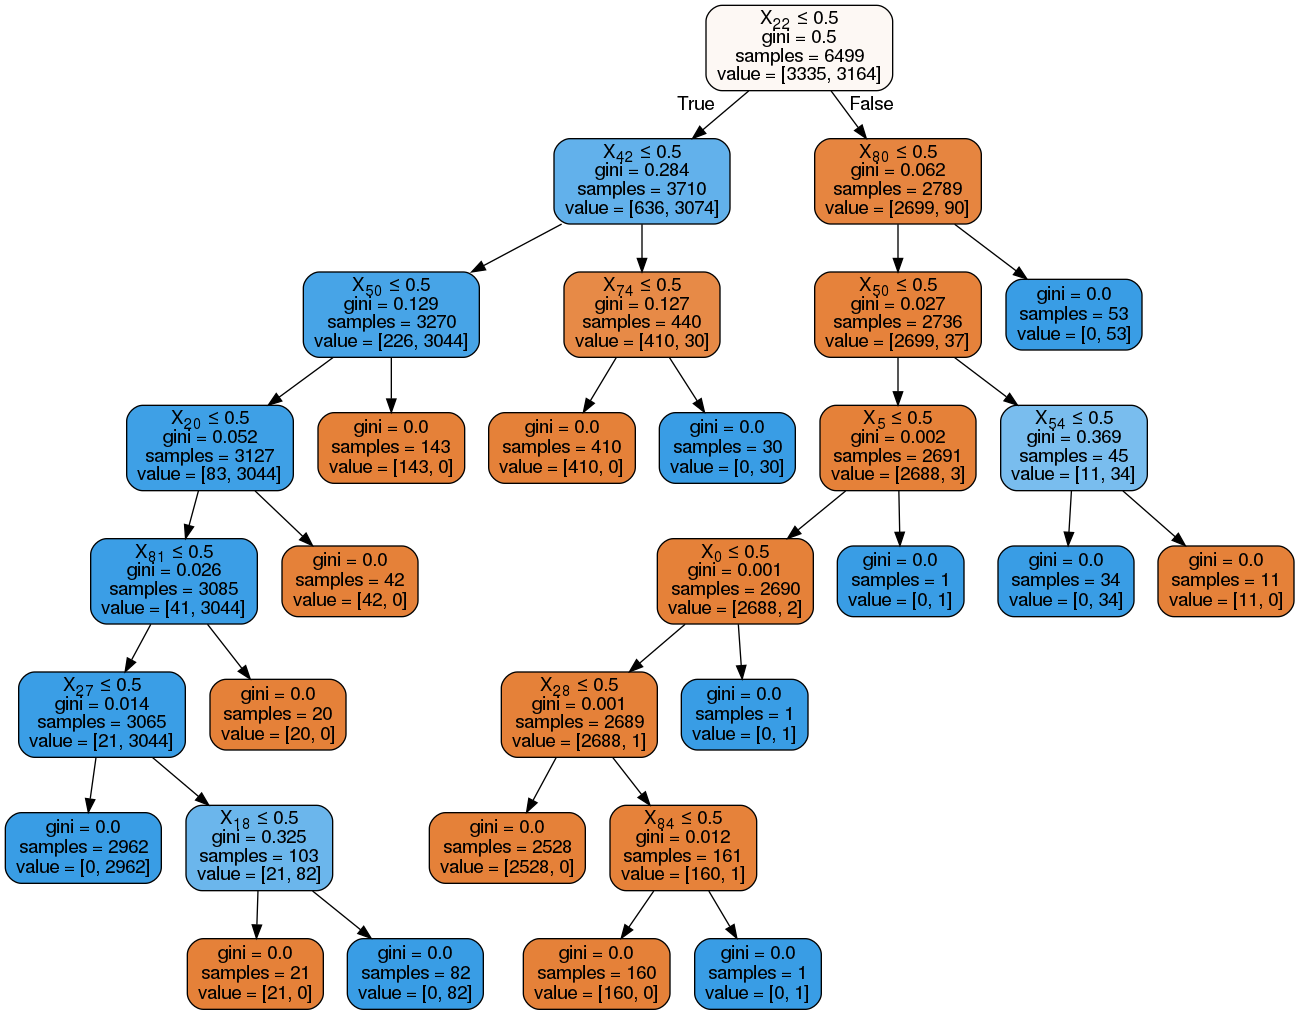

In [28]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Bonus Challenge 1 - Use a Different ML Algorithm to Evaluate Model

Repeat the steps here to predict and evaluate the model but instead use gradient boosted classification. Your end result should be a confusion matrix comparing the predicted and observed y values for the test sample. You can read more about gradient boosting [here](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/).

To calculate the gradient boosted classification, use the [`GradientBoostingClassifier` of Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

class sklearn.ensemble.GradientBoostingClassifier(loss=’deviance’, learning_rate=0.1, n_estimators=100, subsample=1.0, criterion=’friedman_mse’, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort=’auto’, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)

In [29]:
# from sklearn.ensemble import GradientBoostingClassifier (at the beginning)
gbc = GradientBoostingClassifier()
# fitting the model with training data set  
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test) 

0.9987692307692307

In [30]:
print(gbc.feature_importances_)

[9.89897174e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.50180533e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.60756101e-06
 1.72386283e-03 6.40631459e-02 1.85378007e-04 1.44730189e-02
 1.96017409e-02 6.95253861e-05 6.15646457e-01 6.28468413e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.40897423e-02
 9.67132231e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.08651112e-04 2.50563167e-05 1.28757799e-01 3.53011338e-03
 1.61880740e-02 3.08288662e-04 8.67580811e-06 1.34082968e-04
 0.00000000e+00 1.20482954e-03 4.82627131e-02 2.71461923e-03
 0.00000000e+00 0.00000000e+00 5.34020576e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.72799277e-06 1.80370848e-03
 0.00000000e+00 0.00000000e+00 1.91381262e-05 0.00000000e+00
 0.00000000e+00 3.671773

In [31]:
# Predicting y with the X test data set
y_pred = gbc.predict(X_test) # Predict class for X.
print(y_pred)

[1 1 1 ... 0 1 1]


In [32]:
confusion_matrix(y_test,y_pred)

array([[873,   0],
       [  2, 750]])

In [33]:
gbc = GradientBoostingClassifier(n_estimators=95)
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test) 

0.9987692307692307

In [34]:
# loss function
gbc.loss_

In [35]:
# The decision function of the input samples, which corresponds to the raw values predicted 
# from the trees of the ensemble . The order of the classes corresponds to that in the attribute classes_. 
# Regression and binary classification produce an array of shape [n_samples]
gbc.decision_function(X_test)

array([ 4.6984477 ,  7.08289535,  5.06225939, ..., -7.09433573,
        7.08289535,  4.84499061])

In [36]:
gbc.get_params(deep=True)

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 95,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [37]:
gbc.predict_log_proba(X_test) # Predict class log-probabilities for X.

array([[-4.70751587e+00, -9.06816628e-03],
       [-7.08373434e+00, -8.38987399e-04],
       [-5.06857067e+00, -6.31128049e-03],
       ...,
       [-8.29447717e-04, -7.09516518e+00],
       [-7.08373434e+00, -8.38987399e-04],
       [-4.85282751e+00, -7.83690244e-03]])

In [38]:
gbc.predict_proba(X_test) # Predict class probabilities for X.

array([[9.02717446e-03, 9.90972826e-01],
       [8.38635547e-04, 9.99161364e-01],
       [6.29140620e-03, 9.93708594e-01],
       ...,
       [9.99170896e-01, 8.29103820e-04],
       [8.38635547e-04, 9.99161364e-01],
       [7.80627398e-03, 9.92193726e-01]])

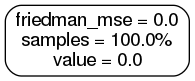

In [39]:
gbc2 = GradientBoostingClassifier(n_estimators=95, learning_rate=1.0, max_depth=3, random_state=42)
gbc2 = gbc2.fit(X_train, y_train)

# Get the tree number 42
sub_tree_42 = gbc2.estimators_[42, 0]

dot_data = tree.export_graphviz(sub_tree_42, out_file=None, filled=True, rounded=True, 
                                special_characters=True, proportion=True,)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# Challenge 3 - Producing Individual Predictions and Saving The Model

One of the most important goals of machine learning models is to act as something like a prediction black box. We would like to pass an observation to the model and get back a prediction as an output. Let's do this in the next cells using the `predict` function. What we want to do is to pick a random mushroom and generate a prediction that will tell us whether it is poisonous.

#### In the next cell, create a function called `get_random_data` that accepts a dataset and returns a random row from the dataset.

In [40]:
# from random import seed
# from random import randint

def get_random_data(dataset):
    """
    Returns a random row of a dataset
    Args:
        dataset [dataframe]: a Pandas dataframe containing a dataset
    Returns:
        A random row in the dataset
    """
    # Your code here
    return pd.DataFrame(dataset.iloc[randint(0,len(dataset))]).T

#### Call `get_random_data` to obtain a random row from the test dataset. Assign the returned row to `random_mushroom` and print.

In [41]:
# getting a random mushroom
random_mushroom = get_random_data(X_test)

#### In the cell below, use the `predict` function to generate a prediction for this random mushroom. Is the random mushroom poisonous? Compare this to the true y value.

In [42]:
# In this step, I am not which ML method we are supposed to use for the prediction
predict_random_mushroom = gbc2.predict(random_mushroom)
print(predict_random_mushroom)

[0]


In [43]:
# Let's check the Ground Truth for this random mushroom
print(dummies_matrix.iloc[random_mushroom.index[0]].class_p)

0


In [44]:
# comments:The prediction is correct and match with the Ground Truth: Edible (0)

#### Our final step is to save our model. 

Do this in the cell below using [pickling](https://docs.python.org/3/library/pickle.html). Import the pickle library and save the `mushroom_rf` model as a pickle file using `pickle.dump()`. Name your file `mushrooms.sav`

In [45]:
# http://www.mograblog.com/2011/05/python-hands-on-pickle-problem.html
# Save the model as a pickle in a file 
out=open('mushrooms.sav','wb')
pickle.dump(mushroom_rf, out)
out.close()

In [46]:
# testing similar ways to do object serialization of other models with pickle
pickle.dump(gbc2,open("gradientboost", 'wb'))
gbc2_f =pickle.load(open("gradientboost", 'rb'))
gbc2_f

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=95,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [47]:
with open('dtree.sav', 'wb') as pickle_tree:
    pickle.dump(dtree, pickle_tree)

with open('dtree.sav', 'rb') as pickle_tree:
    dtree_f = pickle.load(pickle_tree)
dtree_f

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Bonus Challenge 2 - Heatmap to Visualize Data Correlation

Practice generating a heatmap to visualize the pairwise column correlations. You can do one of the following two things (or both if you like):

* Create a heatmap using the p-value matrix for the pairwise Chi-Square test of independence. 

* Use Scikit-Learn's `LabelEncoder` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)) to transform the raw categorical variables to ordinal. Then calculate the correlation matrix using the ordinal values.

If you're scratching your hairs off, refer to [this example for the first way](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9) and [this example for the second way](https://www.kaggle.com/haimfeld87/analysis-and-classification-of-mushrooms). 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]), <a list of 23 Text xticklabel objects>)

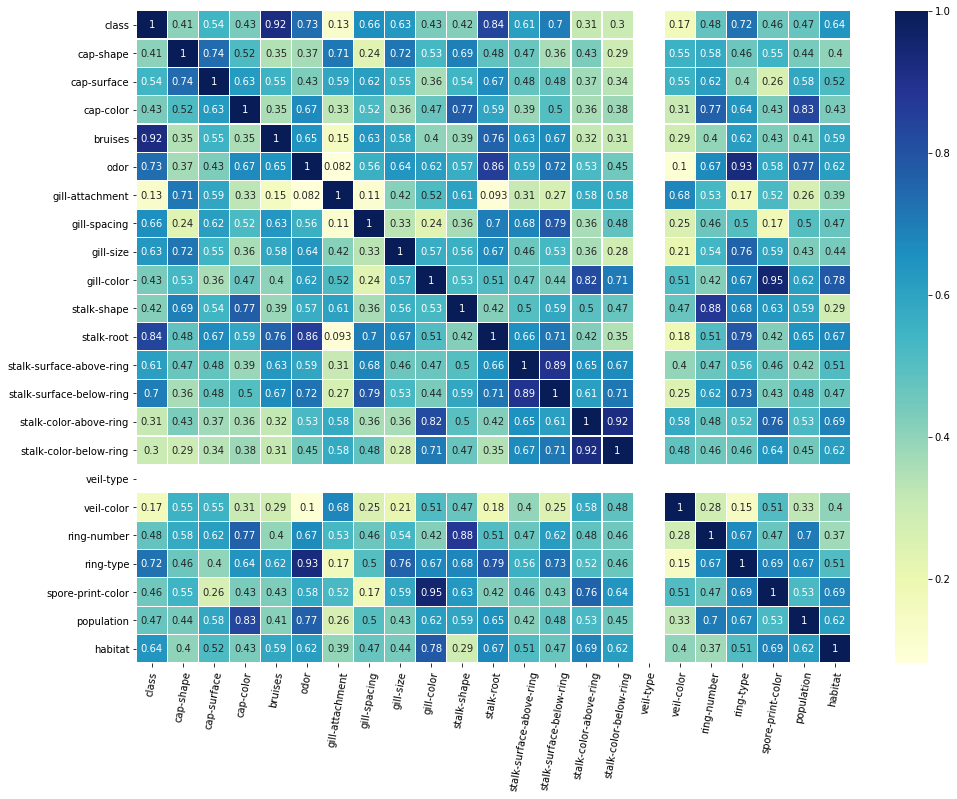

In [64]:
p_values_labencod = p_values_matrix.apply(preprocessing.LabelEncoder().fit_transform)
# Creating a heatmap using the p-value matrix for the pairwise Chi-Square test of independence.
plt.figure(figsize=(16,12))
sns.heatmap(p_values_labencod.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.xticks(rotation=80)

In [103]:
# Using Scikit-Learn's LabelEncoder to transform the raw categorical variables to ordinal. 
# https://chrisalbon.com/machine_learning/preprocessing_structured_data/convert_pandas_categorical_column_into_integers_for_scikit-learn/
mushrooms_encod = mushrooms.copy()
le = preprocessing.LabelEncoder()
list_col_encod = []
for col in mushrooms_encod.columns:
    le.fit(mushrooms_encod[col])
    list_col_encod.append(set(le.classes_))
    le.transform(mushrooms_encod[col])
mushrooms_encod.columns = list_col_encod
# if we would like to do the contrary (to transform integers into categories), we would do the following (not our case)
# list(le.inverse_transform(variable_int_to_cat))

In [107]:
# mushrooms_encod_matrix=pd.DataFrame(columns=mushrooms_encod.columns,index=mushrooms_encod.columns)
# for r in mushrooms_encod.columns:      # for each var in row
#     for c in mushrooms_encod.columns:  # for each var in column
#         mushrooms_encod_matrix[r][c] = chi2_contingency(pd.crosstab(mushrooms_encod[r], mushrooms_encod[c]))[1] # 1 is p-value test result
# display(mushrooms_encod_matrix)

In [109]:
# # Calculating the correlation matrix using the ordinal values
# plt.figure(figsize=(16,12))
# sns.heatmap(mushrooms_encod.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
# plt.xticks(rotation=80)

NOTE: NOT ABLE TO DO THE DUMMY (ORDINAL FROM CATEGORICAL) MATRIX THROUGH LABEL ENCODER